In [1]:
import nltk
import numpy as np
import pandas as pd
import requests
import seaborn as sns

import matplotlib.pyplot as plt

import string

from nltk import sent_tokenize,word_tokenize

from nltk import FreqDist

from wordcloud import WordCloud, STOPWORDS



In [2]:
#must be a string in entry

def cleaning(var):    
    plain_string = ""
    for x in var:
        x.lower()
        if (( 'a' <= x and x <= 'z') or x == ' '):
            plain_string += x
        elif x == '\'': #we replace the ' by a space 
            plain_string += ' '
    return plain_string 

In [3]:
df = pd.read_csv("train.csv")
author_list = ['EAP', 'HPL', 'MWS']
df.text= df.text.astype(str)
df.author = pd.Categorical(df.author)

In [4]:
#cleaning(df['text'][0])   #possible to try after running next cells

In [5]:
#these are the full text from the authors in array
eap = df[df.author=="EAP"]["text"].values
hpl = df[df.author=="HPL"]["text"].values
mws = df[df.author=="MWS"]["text"].values

#these are the full text from the authors in string containing all the lines of an author
eap_s = " ".join(eap)
hpl_s = " ".join(hpl)
mws_s = " ".join(mws)

#these are the full PLAIN (without capital and ponctuation) text from the authors in string containing all the lines of an author

eap_s_c = cleaning(eap_s)
hpl_s_c = cleaning(hpl_s)
mws_s_c = cleaning(mws_s)



In [6]:
from nltk.collocations import *

In [7]:
def num_sent(var):
    sentences = nltk.Text(sent_tokenize(var))
    return len(sentences)

In [8]:
df['sentence'] = df.text.apply(sent_tokenize)

In [9]:
df['nb_sentence']=df.sentence.apply(len)

<h1> Favorite Bigrams </h1>

In [10]:
#favorite bigrams for EAP
eap_content = nltk.Text(word_tokenize(eap_s))

finder = nltk.BigramCollocationFinder.from_words(eap_content)
bigram_measures = nltk.collocations.BigramAssocMeasures()
ignored_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
finder.apply_freq_filter(10)
print(finder.nbest(bigram_measures.pmi,50))

[('Ourang', 'Outang'), ('Chess', 'Player'), ('New', 'York'), ('St.', 'Eustache'), ('Von', 'Kempelen'), ('Rue', 'Morgue'), ('General', 'John'), ('Monsieur', 'Maillard'), ('Madame', 'Deluc'), ('main', 'compartment'), ('...', '...'), ('Marie', 'Rogêt'), ('Madame', 'Lalande'), ('Madame', "L'Espanaye"), ('right', 'angles'), ('Mr.', 'Crab'), ('years', 'ago'), ('brief', 'period'), ('Mr.', 'Ellison'), ('twenty', 'four'), ('great', 'measure'), ('state', 'room'), ('taken', 'place'), ('beyond', 'doubt'), ('left', 'arm'), ('old', 'lady'), ('four', 'feet'), ('said', 'Dupin'), ('well', 'known'), ('three', 'days'), ('many', 'years'), ('back', 'door'), ('every', 'thing'), ('old', 'man'), ('full', 'length'), ('two', 'feet'), ('first', 'place'), ('could', 'scarcely'), ('say', 'nothing'), ('never', 'yet'), ('long', 'time'), ('looked', 'upon'), ('fell', 'upon'), ('every', 'one'), ('hand', 'upon')]


In [11]:
#favorite bigrams for hpl
hpl_content = nltk.Text(word_tokenize(hpl_s))

finder = nltk.BigramCollocationFinder.from_words(hpl_content)
bigram_measures = nltk.collocations.BigramAssocMeasures()
ignored_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
finder.apply_freq_filter(10)
print(finder.nbest(bigram_measures.pmi,50))

[('Yog', 'Sothoth'), ('Brown', 'Jenkin'), ('Tempest', 'Mountain'), ('Hatheg', 'Kla'), ('Professor', 'Angell'), ('seventeenth', 'century'), ('Sir', 'Wade'), ('New', 'England'), ('Old', 'Bugs'), ('Arthur', 'Jermyn'), ('Old', 'Ones'), ('Herbert', 'West'), ('Old', 'Man'), ('small', 'paned'), ('Wilbur', 'Whateley'), ('Dr.', 'Armitage'), ('shunned', 'house'), ('years', 'ago'), ('small', 'hours'), ('blue', 'eyes'), ('next', 'day'), ('old', 'woman'), ('bearded', 'man'), ('night', 'wind'), ('young', 'men'), ('old', 'man'), ('ancient', 'house'), ('never', 'seen'), ("n't", 'know'), ('looked', 'like'), ('great', 'great'), ('could', 'see'), ('first', 'time'), ('strange', 'things'), ('one', 'another'), ('one', 'might'), ('one', 'thing'), ('one', 'night'), ('could', "n't"), ('one', 'could')]


In [12]:
#favorite bigrams for mws
mws_content = nltk.Text(word_tokenize(mws_s))

finder = nltk.BigramCollocationFinder.from_words(hpl_content)
bigram_measures = nltk.collocations.BigramAssocMeasures()
ignored_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
finder.apply_freq_filter(10)
print(finder.nbest(bigram_measures.pmi,50))

[('Yog', 'Sothoth'), ('Brown', 'Jenkin'), ('Tempest', 'Mountain'), ('Hatheg', 'Kla'), ('Professor', 'Angell'), ('seventeenth', 'century'), ('Sir', 'Wade'), ('New', 'England'), ('Old', 'Bugs'), ('Arthur', 'Jermyn'), ('Old', 'Ones'), ('Herbert', 'West'), ('Old', 'Man'), ('small', 'paned'), ('Wilbur', 'Whateley'), ('Dr.', 'Armitage'), ('shunned', 'house'), ('years', 'ago'), ('small', 'hours'), ('blue', 'eyes'), ('next', 'day'), ('old', 'woman'), ('bearded', 'man'), ('night', 'wind'), ('young', 'men'), ('old', 'man'), ('ancient', 'house'), ('never', 'seen'), ("n't", 'know'), ('looked', 'like'), ('great', 'great'), ('could', 'see'), ('first', 'time'), ('strange', 'things'), ('one', 'another'), ('one', 'might'), ('one', 'thing'), ('one', 'night'), ('could', "n't"), ('one', 'could')]


<h1> Favorite Trigrams </h1>

In [13]:
#favorite trigrams for EAP

finder = nltk.TrigramCollocationFinder.from_words(eap_content)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)
sorted(finder.nbest(trigram_measures.pmi,15))

[('Al', 'contento', 'ond'),
 ('Amplitudine', 'Beati', 'Regni'),
 ('Chorum', 'Ecclesiae', 'Maguntinae'),
 ('Coelius', 'Secundus', 'Curio'),
 ('Dicebant', 'mihi', 'sodales'),
 ('Emicant', 'Trabes', 'quos'),
 ('Et', 'chez', 'J.'),
 ('Ex', 'nihilo', 'nihil'),
 ('FACTS', 'FOR', 'SIMILES'),
 ('Ferdinand', 'Fitz', 'Fossillus'),
 ('Fitz', 'Fossillus', 'Feltspar'),
 ('Five', 'Six', 'Seven'),
 ('Flying', 'Machine', 'Arrival'),
 ('Horreur', 'chien', 'Baptiste'),
 ('Ju', 'Kiao', 'Li')]

In [14]:
#favorite trigrams for HPL

finder = nltk.TrigramCollocationFinder.from_words(hpl_content)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)
sorted(finder.nbest(trigram_measures.pmi,15))

[('AHHHH', 'AH', "E'YAAHHHH"),
 ('AM', 'CHARLES', 'LE'),
 ('Aurelius', 'Antoninus', 'Flavius'),
 ('Big', 'Cypress', 'Swamp'),
 ('Bombastes', 'Marcellinus', 'Deodamnatus'),
 ('CHARLES', 'LE', 'SORCIER'),
 ('Coma', 'Berenices', 'shimmers'),
 ('Cornelius', 'Valerius', 'Pompeius'),
 ('DERELICT', 'FOUND', 'AT'),
 ('EH', 'AHHHH', 'AH'),
 ('FOUND', 'AT', 'SEA'),
 ('Gallant', 'LEEDS', 'auspiciously'),
 ('Geschichte', 'der', 'Ostrogothen'),
 ('International', 'Date', 'Line'),
 ('Job', 'Ives', 'diagnosed')]

In [15]:
#favorite trigrams for MWS

finder = nltk.TrigramCollocationFinder.from_words(mws_content)
trigram_measures = nltk.collocations.TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)
sorted(finder.nbest(trigram_measures.pmi,15))

[('Che', 'fra', 'mortali'),
 ('Di', 'mie', 'tenere'),
 ('Drury', 'Lane', 'Theatre'),
 ('Pareamo', 'aver', 'qui'),
 ('Sotto', "l'ombra", 'perpetua'),
 ('T.', 'L.', 'Beddoes'),
 ('altro', 'lavoro', 'Credea'),
 ('aver', 'qui', 'tutto'),
 ('bel', 'viso', 'sereno'),
 ('ben', 'raccolto', 'Che'),
 ('cada', 'passo', 'que'),
 ('che', 'mai', 'Raggiar'),
 ('continuo', 'el', 'hombre'),
 ('da', 'es', 'sobre'),
 ('e', 'qual', 'fero')]

<h1> Type of first and last words of sentence</h1>

<h2> First word </h2>

In [16]:
def first_word_type(sent):
    res=None
    typ=nltk.pos_tag(sent.split())
    i=0
    j=0
    word=typ[i][0].lower()
    while i<len(sent.split()):
        if j<len(word) and word[j] >= 'a' and word[j] <= 'z':
            return typ[i][1]
        i=i+1
    
    return res

In [17]:
#new dataframe where eache line is a sentence

tab_sentence=pd.DataFrame([[df['sentence'].iloc[0][0],df['author'].iloc[0]]] )
tab_sentence.columns=['sentence','author']

idx=1

for i in range(1,len(df)):
    for j in range(len(df['sentence'].iloc[i])):
        if df['sentence'].iloc[i][j] != '.':
            val = [df['sentence'].iloc[i][j],df['author'].iloc[i]]
            tab_sentence.loc[idx]= val
            idx=idx+1

In [18]:
tab_sentence['first_word']=tab_sentence.sentence.apply(first_word_type)

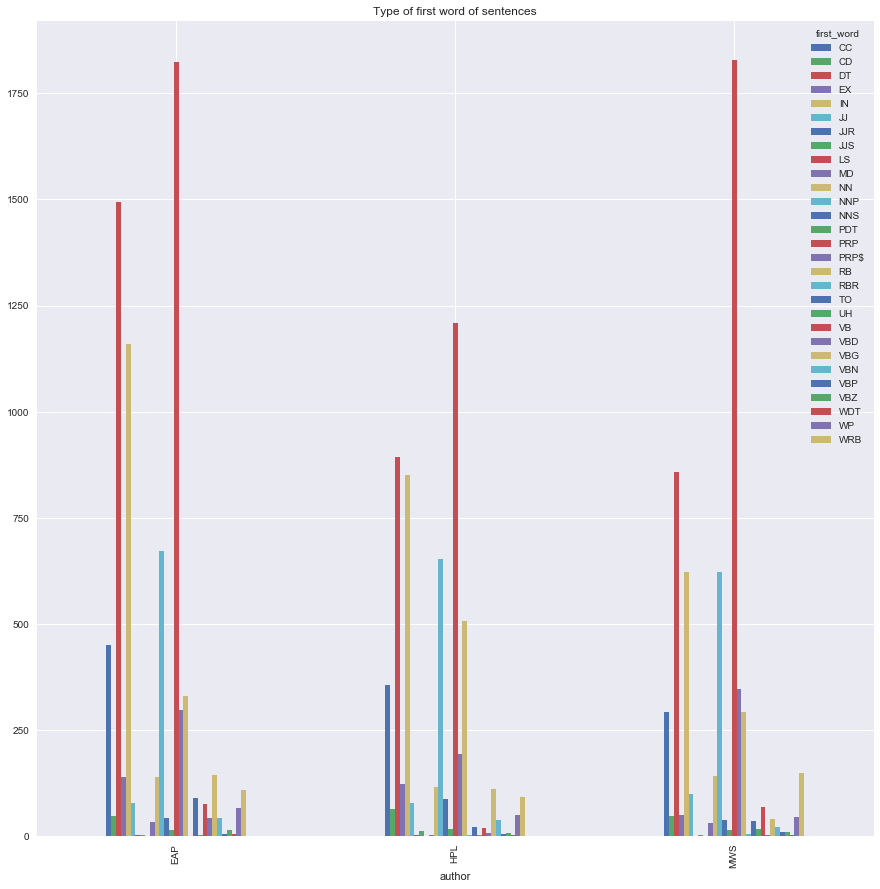

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
type_first_word = tab_sentence.groupby(['author','first_word'])
type_first_word.size().unstack().plot(kind='bar',title="Type of first word of sentences",figsize=(15,15))

In [36]:
first_word_type(tab_sentence['sentence'].iloc[27])

'NNP'

<h2> Last word </h2>

In [20]:
def last_word_type(sent):
    res=None
    typ=nltk.pos_tag(sent.split())
    i=1
    j=0
    word=typ[-i][0].lower()
    while i<len(sent.split()):
        if j<len(word) and word[j] >= 'a' and word[j] <= 'z':
            return typ[-i][1]
        i=i+1
    
    return res

In [21]:
tab_sentence['last_word']=tab_sentence.sentence.apply(last_word_type)

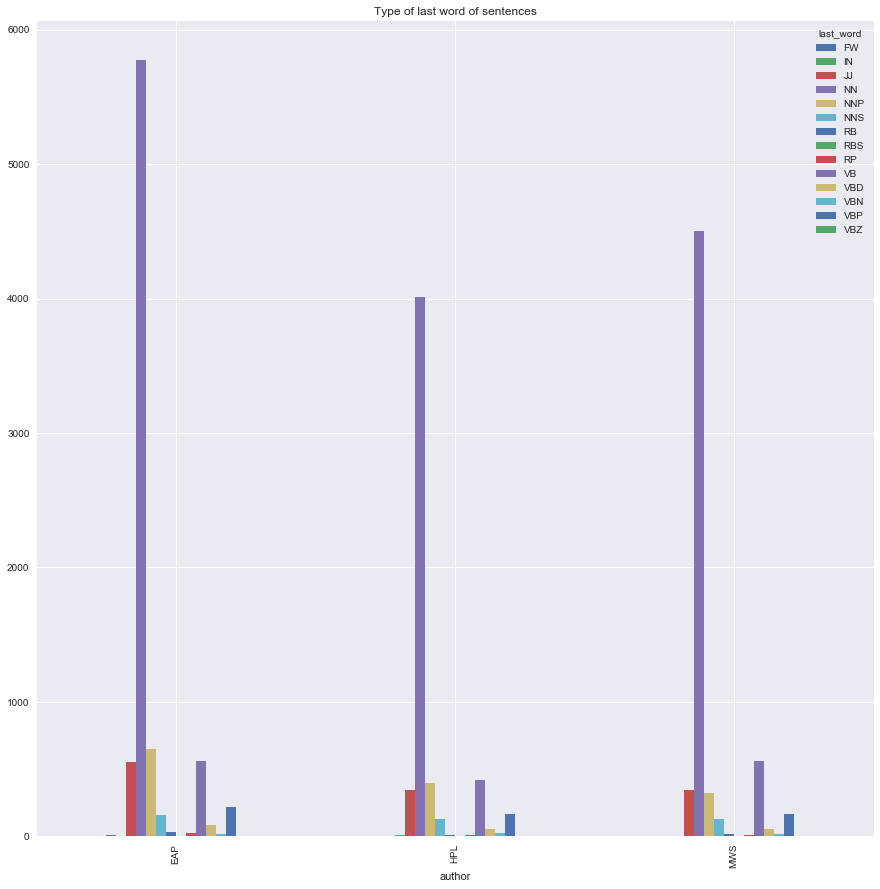

In [22]:
type_last_word = tab_sentence.groupby(['author','last_word'])
type_last_word.size().unstack().plot(kind='bar',title="Type of last word of sentences",figsize=(15,15))

<h2> Two first words </h2>

In [23]:
def twofirst_words_type(sent):
    res = None
    if len(sent.split()) > 1:
        typ=nltk.pos_tag(sent.split())
        res= [typ[0][1],typ[1][1]] 
    return res

In [24]:
tab_sentence['two_first_words']=tab_sentence.sentence.apply(twofirst_words_type)

In [25]:
tab_sentence

,sentence,author,first_word,last_word,two_first_words
0,"This process, however, afforded me no means of...",EAP,DT,NN,"[DT, NN]"
1,It never once occurred to me that the fumbling...,HPL,PRP,NN,"[PRP, RB]"
2,"In his left hand was a gold snuff box, from wh...",EAP,IN,NN,"[IN, PRP$]"
3,How lovely is spring As we looked from Windsor...,MWS,WRB,NN,"[WRB, RB]"
4,"Finding nothing else, not even gold, the Super...",HPL,VBG,NN,"[VBG, NN]"
5,"A youth passed in solitude, my best years spen...",MWS,DT,NN,"[DT, NN]"
6,"The astronomer, perhaps, at this point, took r...",EAP,DT,VB,"[DT, NN]"
7,The surcingle hung in ribands from my body.,EAP,DT,NN,"[DT, NN]"
8,I knew that you could not say to yourself 'ste...,EAP,PRP,VB,"[PRP, VBD]"
9,I confess that neither the structure of langua...,MWS,PRP,NN,"[PRP, VBP]"


In [26]:
#type_two_first_wordw = tab_sentence.groupby(['author','two_first_words'])
#type_two_first_wordw.size().unstack().plot(kind='bar',title="Type of first word of sentences",figsize=(15,15))

#Does not Work on lists !!!

In [27]:
def twolast_words_type(sent):
    res = None
    if len(sent.split()) > 1:
        typ=nltk.pos_tag(sent.split())
        res= [typ[-2][1],typ[-1][1]] 
    return res

In [28]:
tab_sentence['two_last_words']=tab_sentence.sentence.apply(twolast_words_type)

In [29]:
tab_sentence

,sentence,author,first_word,last_word,two_first_words,two_last_words
0,"This process, however, afforded me no means of...",EAP,DT,NN,"[DT, NN]","[DT, NN]"
1,It never once occurred to me that the fumbling...,HPL,PRP,NN,"[PRP, RB]","[JJ, NN]"
2,"In his left hand was a gold snuff box, from wh...",EAP,IN,NN,"[IN, PRP$]","[NN, NN]"
3,How lovely is spring As we looked from Windsor...,MWS,WRB,NN,"[WRB, RB]","[CC, NN]"
4,"Finding nothing else, not even gold, the Super...",HPL,VBG,NN,"[VBG, NN]","[PRP$, NN]"
5,"A youth passed in solitude, my best years spen...",MWS,DT,NN,"[DT, NN]","[PRP$, NN]"
6,"The astronomer, perhaps, at this point, took r...",EAP,DT,VB,"[DT, NN]","[JJ, VB]"
7,The surcingle hung in ribands from my body.,EAP,DT,NN,"[DT, NN]","[PRP$, NN]"
8,I knew that you could not say to yourself 'ste...,EAP,PRP,VB,"[PRP, VBD]","[VB, VB]"
9,I confess that neither the structure of langua...,MWS,PRP,NN,"[PRP, VBP]","[IN, NN]"


<h1> Foreign Language </h1>

In [30]:
#!pip install langdetect
from langdetect import detect

In [31]:
def language_text(sent):
    res=None
    if len(sent.split())>1:
        res=detect(sent)
    return res

In [32]:
tab_sentence['language']=tab_sentence.sentence.apply(language_text)

KeyboardInterrupt: 

In [ ]:
tab_sentence[tab_sentence['language']!='en']


In [ ]:
language = tab_sentence.groupby(['author','language'])
language.size().unstack().plot(kind='bar',title="Language of a sentence",figsize=(15,15))

<h1> Emotions </h1>

In [ ]:
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [ ]:
def emotion_sentence(sent):
    n=len(sent.split())
    res={'anger':0,
        'anticipation':0,
        'disgust':0,
        'fear':0,
        'joy':0,
        'negative':0,
        'positive':0,
        'sadness':0,
        'surprise':0,
        'trust':0}
    emotion_dict=get_nrc_data()
    for word in sent.split():
        if word in emotion_dict:
            for j in emotion_dict[word]:
                res[j]=res[j]+n
    return res
            

In [ ]:
def anger_ratio(sent):
    return emotion_sentence(sent)['anger']
def anticipation_ratio(sent):
    return emotion_sentence(sent)['anticipation']
def disgust_ratio(sent):
    return emotion_sentence(sent)['disgust']
def fear_ratio(sent):
    return emotion_sentence(sent)['fear']
def joy_ratio(sent):
    return emotion_sentence(sent)['joy']
def negative_ratio(sent):
    return emotion_sentence(sent)['negative']
def positive_ratio(sent):
    return emotion_sentence(sent)['positive']
def sadness_ratio(sent):
    return emotion_sentence(sent)['sadness']
def surprise_ratio(sent):
    return emotion_sentence(sent)['surprise']
def trust_ratio(sent):
    return emotion_sentence(sent)['trust']

In [ ]:
tab_sentence['anger']=tab_sentence.sentence.apply(anger_ratio)
tab_sentence['anticipation']=tab_sentence.sentence.apply(anticipation_ratio)
tab_sentence['disgust']=tab_sentence.sentence.apply(disgust_ratio)
tab_sentence['fear']=tab_sentence.sentence.apply(fear_ratio)
tab_sentence['joy']=tab_sentence.sentence.apply(joy_ratio)
tab_sentence['negative']=tab_sentence.sentence.apply(negative_ratio)
tab_sentence['positive']=tab_sentence.sentence.apply(positve_ratio)
tab_sentence['sadness']=tab_sentence.sentence.apply(sadness_ratio)
tab_sentence['surprise']=tab_sentence.sentence.apply(surprise_ratio)
tab_sentence['trust']=tab_sentence.sentence.apply(trust_ratio)